<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics
When there is not a clear understanding of the physics process, or the variables required to do physical modelling are not available, then statistics plays a vital role. There are various modules available in python to deal with statistics, the most commonly used is scipy.stats. Additionally
there is one more useful modules statistics, which can be downloaded from http://bonsai.hgc.jp/~mdehoon/software/python/Statistics/. This module is not available for download using the pip, and hence you should download it using internet browser, and then install it using either pip or python setup.py install. Detailed installation instructions are provided at: http://bonsai.hgc.jp/~mdehoon/software/python/Statistics/manual/index.xhtml#TOC47

## 5.1 Empirical distributions
Most of hydrological variables are continuous, but because of our measurement capability we measure them discretely. The classification of discrete data using bins, provides mean to treat the discrete data as continuous. Visualization of the underlying distribution of data is done by plotting the Histogram. The histogram depicts the frequency over discrete intervals (bins). So let us begin with
histogram. In the following example, first we will generate some synthetic data, and then compute
and plot the histogram.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100) # generate some synthetic data

# compute histogram
n, bin_edges = np.histogram(x)
bin_center = 0.5*(bin_edges[:-1]+bin_edges[1:])

The $np.histogram$ provides the number of bins in each interval (n) and edges of the bins. We use the edges of the bar to compute the center of the bars and will use bar plot to make the histogram. We could have also directly used hisgoram function of matplotlib to make the plot, however we would like to understand how to convert histogram into PDF.

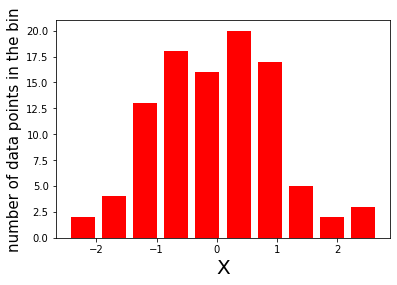

In [2]:
plt.bar(bin_center, n, width=0.4, color='red')
plt.xlabel('X', fontsize=20)
plt.ylabel('number of data points in the bin', fontsize=15)
plt.show()

The histogram of the data is shown in above figure. In this example, because we have just created 100 random number from the normal distribution, the histogram is not showing the behaviour that normal distribution should show.

Each bar in histogram tells us that how many time the data was in particular bin. A better way to look at the behaviour of data is to look into relative histogram, which tells us about the probability with which data was in some range. The relative histogram or relative frequency is obtained by
dividing the frequency in each bin by the sum of frequencies in all the bins. The relative histogram
represents the probability of data occurring in the bins. Either we can use the histogram function
to first compute histogram, and then divide by total number of frequency, or we can directly use
the *relfreq* (from scipy.stats library) function. *relfreq* provides the relative frequency, along with other output which are similar to that of histogram.

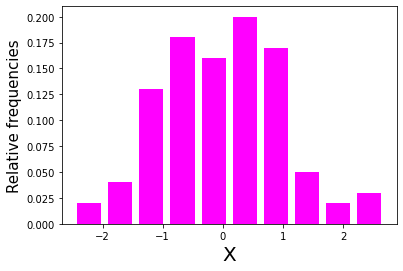

In [3]:
relfreqs = n/len(x)

plt.bar(bin_center, relfreqs, width=0.4, color='magenta')
plt.xlabel('X', fontsize=20)
plt.ylabel('Relative frequencies', fontsize=15)
plt.show()

Because we are using the same x that was used in previous example, hence we are not re-calculating
the bins. In this bar plot, we are using magenta color. The different color of plot, is just to make
you familiar with colors and font sizes. And, it does not mean that we should use different color for
relative frequency diagram than the histogram; nothing prevents us from using the same color.

The relative histogram is shown in above figure. The relative histogram tells us how experimental data behaves; how many times (or with what probability) the data was in some range. The relative histograms only tell about experimental data, about the data we have. What about the data we are going to get into future? The PDF is a better indicator to say something about the future data. The probability density function (pdf) of a random variable is a function that describes the relative likelihood for this random variable to occur at a given point. The probability for the random variable to fall within a particular region is given by the integral of this variables density over the region. The probability density function is non-negative everywhere, and its integral over the entire space
is equal to one. We can divide the relative frequency by the bin size, and get the pdf. We will be using *bar* plot to plot the PDF.

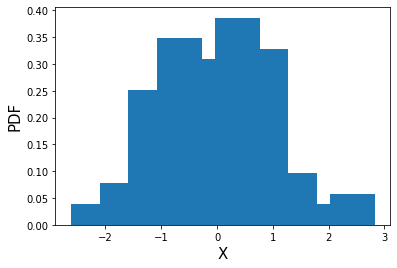

In [4]:
bin_size = bin_edges[1] - bin_edges[0] # remember in our case bins are of same size
pdf = relfreqs/bin_size

plt.bar(bin_center, pdf)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

A simple way to compute PDF is to use *hist* function. *hist* generates the plot, and also returns the value of PDF over each bin. The number of bins are controlled by giving second argument, in the following example it is set at 10. The bins provide the lower and upper ranges of the bin, hence its length is one extra than the number of bins. If we set the *density* to True, we directly get the PDF instead of manually computing the PDF like we did above. However, it is important to understand the relationship between histogram and PDF.

Apart from the color we are specifying alpha value to hist function. alpha value controls the transparency of the plot; 0.0 means fully transparent and 1.0 is fully opaque. Below figure shows the bar plot of the PDF.

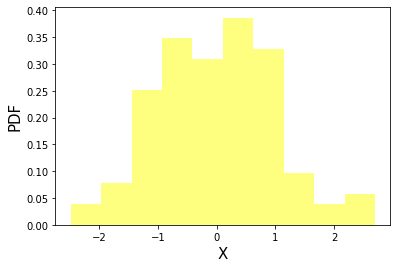

In [5]:
plt.hist(x, 10, density=True, facecolor='yellow', alpha=0.5)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

The cumulative distribution function (CDF) describes the probability that a real-valued random variable $X$ with a given probability distribution will be found at a value less than or equal to $x$. *cumfreq* provides cumulative frequency of the data, which can be used to compute the CDF. If we divide cumulative frequency by the total frequency, we get the CDF. The last value of cummulative frequency is equal to the total frequency, hence we are using this to compute CDF. The CDF is shown in below figure.

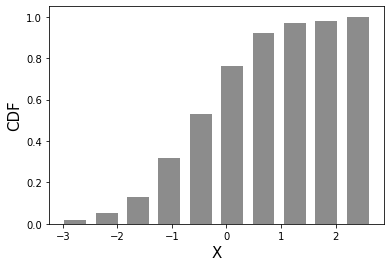

In [6]:
from scipy import stats as st

res = st.cumfreq(x, numbins=10)

plt.bar(res.lowerlimit+np.arange(10)*res.binsize, res.cumcount/res.cumcount[-1], width=0.4, color='black', alpha=0.45)
plt.xlabel('X', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

We can use ECDF function of the *statsmodels* library to directly estimate the empirical cumulative distribution function (ECDF).  The empirical distribution function (CDF) is the cumulative distribution function associated with the empirical measure of the sample. 


This cdf is a step function
that jumps up by 1/n at each of the n data points. The empirical distribution function estimates
the underlying cdf of the points in the sample. In the previous example, we have estimated CDF
(ECDF) after classifying data into some bins. This means, we assumed that the data behaves in a
statistical similar way over some small range. We can estimate CDF without making this assumption
also, which would be done using ECDF function. The output form ECDF function is a object which
store the value of data and their corresponding ECDF. The data is retrieved using ecdf.x and their
corresponding ECDF is retrieved using ecdf.y. The ecdf is the name of variable that you have
defined to store the output of ECDF function, if you use some other name, you need to use same
name to retrieve x and y attributes.

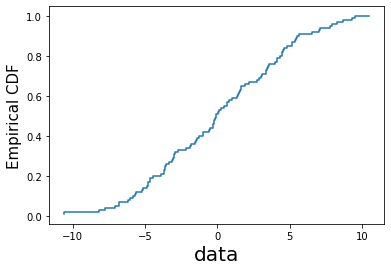

In [7]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

data = np.random.normal(0, 5, size=100)

ecdf = ECDF(data)
plt.step(ecdf.x,ecdf.y)
plt.xlabel('data', fontsize=20)
plt.ylabel('Empirical CDF', fontsize=15)
plt.show()

We can also use ecdf to evaluate ECDF at any value of data. Let us evaluate and print value of
ECDF at some data point (say at 0).

In [8]:
print(ecdf(0))

0.5


The empirical CDF estimated using the method mentioned above results in the step function, which does not look so nice. A better way of estimating ECDF is by using kernel functions. This can be done by statistics module. The statistics library provides functions to estimate PDF and CDF
using various kernel functions. *cdf* attribute is used for accessing the CDF. Inside legend
we are defining location (loc) of the legend as best, which means Python will try to put the legend
in the way, as to minimize the interference with plot. The resulted graph after using this curve is
shows in the below figure. It is evident from this figure, that this shows a smoother variation compared to ordinary method of ECDF estimation.

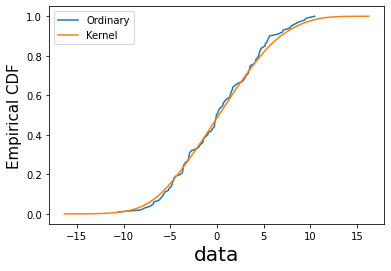

In [17]:
import statsmodels.api as sm

kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()  

plt.plot(ecdf.x, ecdf.y, label='Ordinary')
plt.plot(kde.support, kde.cdf, label='Kernel')
plt.xlabel('data', fontsize=20)
plt.ylabel('Empirical CDF', fontsize=15)
plt.legend(loc='best')
plt.show()